In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
col_names = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
fish = pd.read_csv('fish.csv', names=col_names)

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [6]:
samples = fish.iloc[:, 1:].values
species = list(fish.iloc[:, 0])

In [7]:
fish['Species'].value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: Species, dtype: int64

## Use KMeans Cluster to predict labels. 
### Compare Labels to Actual
#### Use n_clusters=4. 
Why 4, because we know there are 4 fish Species

Find the labels using KMeans Cluster, and compare to actual fish Species

In [9]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [10]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0     0      0     13
3            0    17      0      0


## Suppose I don't have the species column. How many clusters?

### For this, look at the model inertia for different number of cluster.

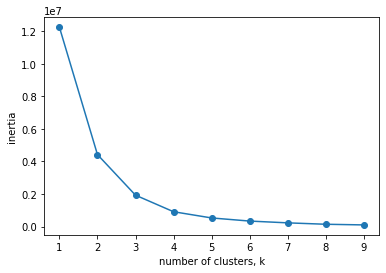

In [11]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Notice from the graph above, that the intertia decreases slowly between 4 clusters and 5 clusters. So, the correct number of clusters = 4.

## Fishdf has 6 different attributes. Worried about Correlation between those attributes. 

In [12]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.897468,0.903960,0.917462,0.289579,0.076129
Length1,0.897468,1.000000,0.999502,0.992451,0.083564,-0.042528
Length2,0.903960,0.999502,1.000000,0.995336,0.109940,-0.020755
Length3,0.917462,0.992451,0.995336,1.000000,0.200880,0.046017
Height,0.289579,0.083564,0.109940,0.200880,1.000000,0.770865
Width,0.076129,-0.042528,-0.020755,0.046017,0.770865,1.000000


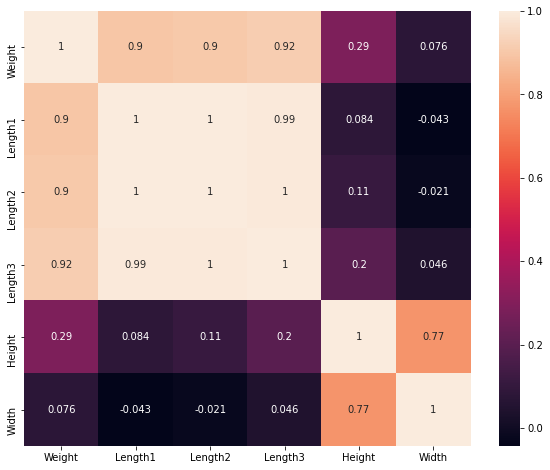

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(fish.corr(), annot=True)

## Use Dimension Reduction: PCA. But how many components?

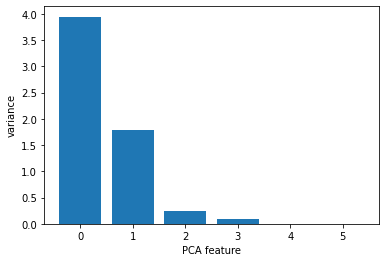

In [14]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### PCA features 0 and 1 have significant variance

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_samples = sc.fit_transform(samples)

In [16]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


## Now, plot the 2 principal components with the fish species

In [17]:
principalDf = pd.DataFrame(data = pca_features
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, fish[['Species']]], axis = 1)

In [19]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-0.576405,-0.946492,Bream
1,-0.368524,-1.171036,Bream
2,-0.280282,-1.597092,Bream
3,-0.009554,-0.819677,Bream
4,0.123895,-1.331212,Bream


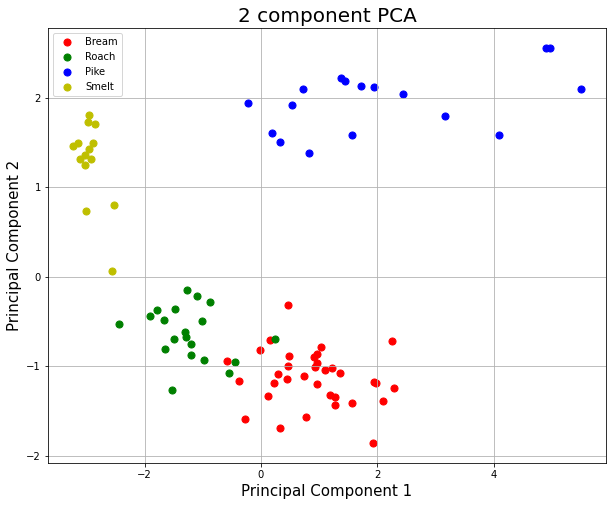

In [20]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bream', 'Roach', 'Pike', 'Smelt']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()